In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()

In [4]:
# Extract a minibatch from the original training dataset
def TrTeSplit(X_tr, y_tr, size):
    X_trspl, X_tespl, y_trspl, y_tespl = train_test_split(X_tr, y_tr, test_size=size, random_state=0)
    X_trspl = X_trspl.reset_index(drop = True)
    X_tespl = X_tespl.reset_index(drop = True)
    y_trspl = y_trspl.reset_index(drop = True)
    y_tespl = y_tespl.reset_index(drop = True)
    
    return X_trspl, X_tespl, y_trspl, y_tespl

# Parameter Tunning using cross validation
def model_param_select(X, y, nfolds):
    n_estimators = [40, 50, 60]
    learning_rate = [0.5, 1.0, 1.5]
    #the range is being reduced since after several runs
    #I have removed some redundant range value that will yield longer run time
    param_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}
    grid_search = GridSearchCV(AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=20)), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

def RMSE(y_test, y_pred):
    rss=((y_test-y_pred)**2).sum()
    mse=np.mean((y_test-y_pred)**2)
    rmse = np.sqrt(np.mean((y_test-y_pred)**2))
    return rmse
    

In [55]:
# Load Data
#new_test = pd.read_csv('sample_train_tiny.csv')
new_train = pd.read_csv('sample_train_tiny.csv')

X_tr = new_train.drop(columns = ['meter_reading', 'timestamp'])
y_tr = new_train['meter_reading']
#X_te = new_test.drop(columns = ['timestamp'])
X_trspl, X_tespl, y_trspl, y_tespl = TrTeSplit(X_tr, y_tr, 0.33)

189.38825224606734


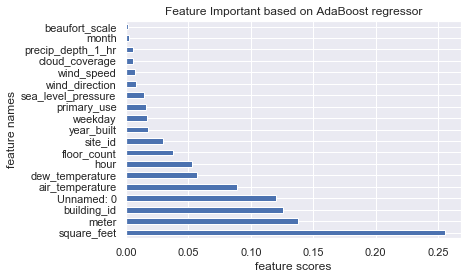

In [56]:
#Implement Adaboost model with the choosen parameter

model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=20), n_estimators = 50, learning_rate = 1.0)
model.fit(X_trspl, y_trspl)
y_pred = model.predict(X_tespl)


rmse = RMSE(y_tespl, y_pred)
print(rmse)

feat_importances = pd.Series(model.feature_importances_, index=X_trspl.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Important based on AdaBoost regressor')
plt.xlabel('feature scores')
plt.ylabel('feature names')
plt.show()

In [5]:
X_train = pd.read_csv(r'Dataset/new_train.csv')

In [7]:
y_train = X_train['meter_reading']
X_train = X_train.drop(columns = ['meter_reading', 'timestamp'])
#X_test = X_test.drop(columns = ['meter_reading', 'timestamp'])

KeyError: 'meter_reading'

In [8]:
X_trspl, X_tespl, y_trspl, y_tespl = TrTeSplit(X_train, y_train, 0.33)

In [ ]:
#Implement Tree model with the choosen parameter

#numbers_sizes = (i*10**exp for exp in range(2, 9) for i in range(1, 10))
#for i in numbers_sizes:
model = AdaBoostRegressor(base_estimator = DecisionTreeRegressor(max_depth=20), n_estimators = 50, learning_rate = 1.0)
model.fit(X_trspl, y_trspl)
y_pred = model.predict(X_tespl)

rmse = RMSE(y_tespl, y_pred)
print(rmse)

feat_importances = pd.Series(model.feature_importances_, index=X_trspl.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Important based on Decision Tree regressor')
plt.xlabel('feature scores')
plt.ylabel('feature names')
plt.show()